In [53]:
import numpy as np
import pandas as pd
import time
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv("diabetic_data.csv",sep=',', header=0, error_bad_lines=False, low_memory=False, decimal='.')
#ograniczenie liczby wierszy do co setnego
df1 = df[df.index % 100 == 0]


In [60]:
srednia = True

In [61]:
def string_to_value(column):
    dict = {}
    k = 0
    unique = df[column].unique()
    unique = sorted(set(unique))
    for unique_value in unique:
        if (unique_value == "nan" or unique_value == "NaN" or unique_value == "NULL" or unique_value == "?" ):
            #nadanie skrajnej liczby latwo widocznej do wyznaczania nulli na wykresie
            dict[unique_value] = -1
        else:
            dict[unique_value] = k
            k+=1
    print(dict)
    return dict

In [65]:
def plot_column(df,column):
    if (is_numeric_dtype(df[column]) == True):
        global srednia
        if(srednia==True):
            dfR = df.groupby(df.index // 100).mean()
            dfR.index = dfR.index*100
        else:
            dfR = df1
        plt.interactive(True)
        dfR.plot(y=column, use_index=True)
        plt.show(block=True)
    else:
        dict = string_to_value(column)
        if(srednia==True):
            dfM = df.replace({column: dict})
            dfR = dfM.groupby(df.index // 100).mean()
            dfR.index = dfR.index*100
        else:
            dfM = df1.replace({column: dict})
            dfR = dfM
        plt.interactive(True)
        dfR.plot(y=column, use_index=True)
        plt.show(block=True)

In [66]:
def plot_everything(df):
    i=0
    colnames = df.columns.get_values()
    colnames.tolist()
    for j in colnames:
        column_name = colnames[i]
        plot_column(df,column_name)
        i+=1

{'?': -1, 'AfricanAmerican': 0, 'Asian': 1, 'Caucasian': 2, 'Hispanic': 3, 'Other': 4}


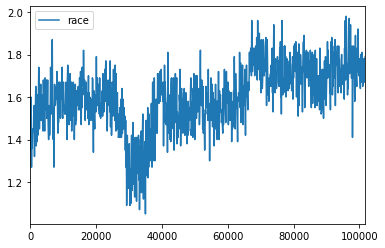

In [67]:
plot_column(df,"race")

In [ ]:
plot_everything(df)